In [232]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [233]:
# 读取图像
image = cv2.imread('./resource/2.jpg')

## jupyter notebook一些使用帮助
jupyter notebook可以把代码一行一行运行，比如运行了上述代码块后，可以

In [234]:
image.shape

(3456, 5184, 3)

就可以像笔记一样方便的查看代码值

不过，也要根据执行先后顺序判断，后面执行的代码会修改前面变量的值

当你在浏览器中写代码时，遇到不熟悉的函数，可以先用鼠标点击函数，在按`shift`+`tab`查看该函数的文档帮助

In [235]:
# 获取图像尺寸
height, width, _ = image.shape
image.shape

(3456, 5184, 3)

In [236]:
# 将图像转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [237]:
# 设定阈值，进行二值化
_, thresh = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)

In [238]:
# 进行噪声消除
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

In [239]:
# 寻找连通区域
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(opening)

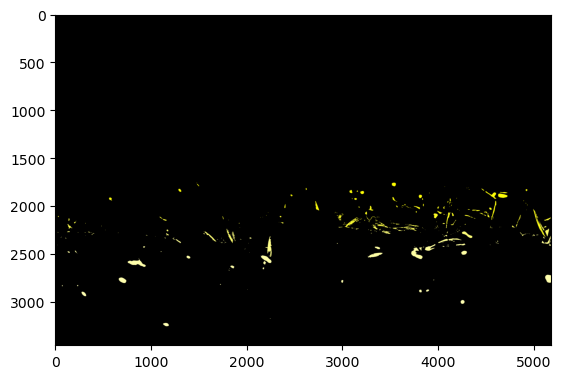

In [240]:
# 显示包含标记的图像
# 创建一个彩色版本的标签图像
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_image = cv2.merge([label_hue, blank_ch, blank_ch])
# 将背景部分标记为黑色
labeled_image[label_hue == 0] = 0

# 显示带有连通组件的彩色图像
plt.imshow(labeled_image[:,:,::-1])


In [241]:
# 加载星星图像
star = cv2.imread('./resource/lens_flare01.png', flags=cv2.IMREAD_UNCHANGED)

In [242]:
# 调整星星的大小
desired_star_size = (64, 64)
resized_star = cv2.resize(star, desired_star_size[:2], interpolation=cv2.INTER_AREA)

In [243]:
# 过滤并绘制发光点
for i, stat in enumerate(stats):
    # 过滤条件可以根据需求调整
    if stat[cv2.CC_STAT_AREA] > 32 and stat[cv2.CC_STAT_AREA] < 800:
        # 在发光点处绘制星星
        x = int(centroids[i][0])
        y = int(centroids[i][1])

        # 计算星星的位置
        x_start = max(0, x - desired_star_size[1] // 2)
        x_end = min(width, x + desired_star_size[1] // 2)
        y_start = max(0, y - desired_star_size[0] // 2)
        y_end = min(height, y + desired_star_size[0] // 2)

        # 处理边界情况
        star_width = x_end - x_start
        star_height = y_end - y_start

        if star_width > 0 and star_height > 0:
            # 将星星图像和原图像叠加在一起
#             overlay = cv2.bitwise_and(image[y_start:y_end, x_start:x_end],
#                                       image[y_start:y_end, x_start:x_end],
#                                       mask=resized_star[:star_height, :star_width, 3])
            overlay = resized_star[:star_height, :star_width, :3]
            background = cv2.bitwise_and(image[y_start:y_end, x_start:x_end],
                                         image[y_start:y_end, x_start:x_end],
                                         mask=cv2.bitwise_not(resized_star[:star_height, :star_width, 3]))
            result = cv2.add(background, overlay)
            

            # 将星星特效添加到原图上
            image[y_start:y_end, x_start:x_end] = result



In [245]:
# 显示识别结果
# 创建窗口并调整大小
# plt.imshow(image[:,:,::-1])

cv2.imshow("", image[::4,::4])
cv2.waitKey(0)
cv2.destroyAllWindows()

